In [2]:
import numpy as np
import matplotlib.pyplot as plt

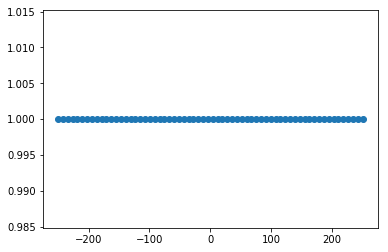

In [193]:
N = 64
max_pos = 250
# pos = 2*max_pos*np.random.uniform(size=N)
pos = np.linspace(-max_pos,max_pos,N)
# pos[0] = np.random.uniform(-max_pos,max_pos)
# pos[1] = np.random.uniform(-max_pos,max_pos)
# pos[2] = np.random.uniform(-max_pos,max_pos)
plt.scatter(pos, np.ones(64))
plt.show()

In [201]:
2*max_pos/N

7

In [208]:
c = 3e8
N_BEAMS = 256
N_FREQ = 256
field_of_view_half_angle = np.arcsin(.2/((2*max_pos/N)*2))*180.0/np.pi
theta = np.linspace(-field_of_view_half_angle*np.pi/180.0, field_of_view_half_angle*np.pi/180.0, N_BEAMS)
freq = np.linspace(1.28,1.53, N_FREQ)
A = np.zeros((N_BEAMS, N), dtype=np.complex64)
# for k in range(N_FREQ):
k = 255
wavelength = c/(freq[k]*1e9)
for i in range(N_BEAMS):
    for j in range(N):
        A[i,j] = np.exp(-2.0j*np.pi*pos[j]*np.sin(theta[i])/wavelength)

In [209]:
eval_pts = 100000
angles = np.linspace(-np.pi/2, np.pi/2, eval_pts)
out = np.zeros((N_BEAMS, eval_pts))
for jj in range(len(angles)):
    signal = [np.exp(2*np.pi*1j*pos[i]*np.sin(angles[jj])/wavelength) for i in range(N)]
    out[:,jj] = np.real(np.dot(A, signal))

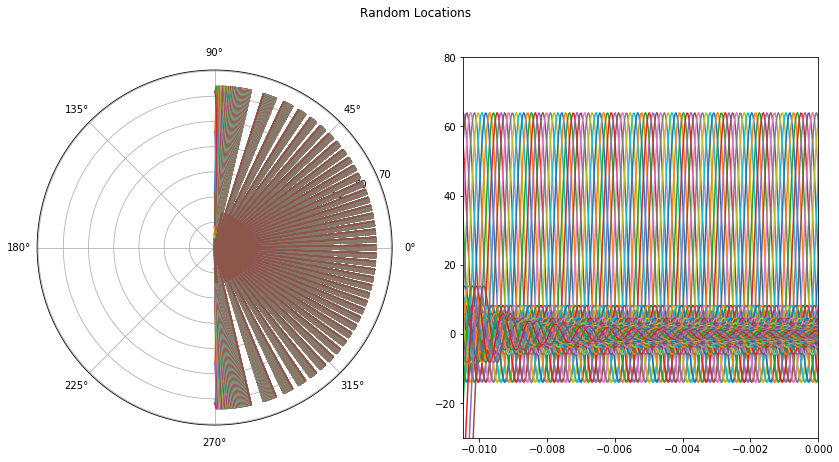

In [210]:
fig = plt.figure(figsize=(14,7))
fig.suptitle("Random Locations")
ax = plt.subplot(121,projection='polar')
ax2 = plt.subplot(122)

for jj in range(256):
    ax.plot(angles, out[jj])
    ax2.plot(angles, out[jj])
    
ax2.axis([-.6*np.pi/180.0, .0*np.pi/180.0, -30, 80])

plt.show()

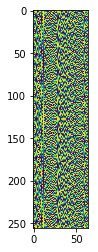

In [182]:
# fig = plt.figure(figsize= (12,12))
plt.imshow(np.real(A))
plt.show()